<a href="https://colab.research.google.com/github/naikshrey2308/ML_Labs/blob/main/ML_Lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

In [4]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
type(X_train), len(X_train), len(X_test), len(y_train)

11490434/11490434 [==============================] - 2s 0us/step


(numpy.ndarray, 60000, 10000, 60000)

The type of the data is numpy array. In order to work with the neural networks, we need to convert the data into appropriate format.

In [5]:
# convert the data to float
X_train = X_train.astype(dtype=np.float32)
X_test = X_test.astype(dtype=np.float32)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

We need to flatten the images of 28 x 28 to feed them into the neural network.

In [7]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

Now we need to convert the given input in the range of 0 to 1 so as to feed it into the neural network. Therefore, we normalize the inputs.

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Create the tensors for the features and targets.

In [9]:
X_train_data = torch.from_numpy(X_train)
X_test_data = torch.from_numpy(X_test)
y_train_data = torch.from_numpy(y_train)
y_test_data = torch.from_numpy(y_test)

X_train_data.shape, y_train_data.shape

(torch.Size([60000, 784]), torch.Size([60000]))

Initialize the model parameters.

In [10]:
batch_size = 32 #@param {type: "number"}
iterations = 10000 #@param {type: "number"}
epochs = iterations / (len(X_train) / batch_size)
epochs = int(epochs)
epochs

5

We can not feed the entire data in the network. Therefore, we load it in parts using `DataLoader`.

In [11]:
dataloader = DataLoader(dataset=X_train_data, batch_size=batch_size, shuffle=False)
outputloader = DataLoader(dataset=y_train_data, batch_size=batch_size, shuffle=False)
testloader = DataLoader(dataset=X_test_data, batch_size=batch_size, shuffle=False)
testoploader = DataLoader(dataset=y_test_data, batch_size=batch_size, shuffle=False)

Here's a look at one of our input images.

In [12]:
def image_display(arr):
    arr = arr.cpu().detach().numpy()
    arr = arr.reshape(28, 28)
    plt.imshow(arr)

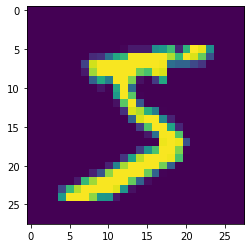

In [13]:
image_display(X_train_data[0])

### Creating the model

In [26]:
class ANNModel(nn.Module):
    def __init__(self, input, hidden, output):
        super(ANNModel, self).__init__()
        self.linear1 = nn.Linear(input, hidden)
        self.linear2 = nn.Linear(hidden, output)
    def forward(self, X):
        X = X.view(-1, 28*28)
        X = torch.sigmoid(self.linear1(X))
        X = self.linear2(X)
        return X

In [27]:
input_dim = (28 * 28)
hidden_dim = (28 * 10)
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)

model.parameters

<bound method Module.parameters of ANNModel(
  (linear1): Linear(in_features=784, out_features=280, bias=True)
  (linear2): Linear(in_features=280, out_features=10, bias=True)
)>

In [28]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.02 #@param {type: "number"}
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Training the model

In [29]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(epochs):
    for i, j in zip(dataloader, outputloader):
        optimizer.zero_grad()
        train = Variable(i)
        labels = Variable(j)
        predictions = model(train)
        loss = nn.functional.cross_entropy(predictions, labels)
        count += 1
        loss.backward()
        optimizer.step()
        if count % 1000 == 0:
            correct = 0
            total = 0
            with torch.no_grad():
              for ti, tj in zip(dataloader, outputloader):
                test = Variable(ti)
                testop = Variable(tj)
                predictions = model(test)
                _, predicted = torch.max(predictions.data, 1)
                total += testop.size(0)
                correct += (predicted == testop).sum().item()
            accuracy = 100 * correct / total
            accuracy_list.append(accuracy)
            print("Loss ... ", loss)
            print("Accuracy ... \n", accuracy)
            loss_list.append(loss.item())
            iteration_list.append(count)

Loss ...  tensor(1.1904, grad_fn=<NllLossBackward0>)
Accuracy ... 
 76.245
Loss ...  tensor(0.6322, grad_fn=<NllLossBackward0>)
Accuracy ... 
 84.32
Loss ...  tensor(0.5951, grad_fn=<NllLossBackward0>)
Accuracy ... 
 86.79
Loss ...  tensor(0.4739, grad_fn=<NllLossBackward0>)
Accuracy ... 
 88.29333333333334
Loss ...  tensor(0.4381, grad_fn=<NllLossBackward0>)
Accuracy ... 
 89.08
Loss ...  tensor(0.3533, grad_fn=<NllLossBackward0>)
Accuracy ... 
 89.225
Loss ...  tensor(0.3871, grad_fn=<NllLossBackward0>)
Accuracy ... 
 89.89666666666666
Loss ...  tensor(0.4531, grad_fn=<NllLossBackward0>)
Accuracy ... 
 90.06833333333333
Loss ...  tensor(0.1804, grad_fn=<NllLossBackward0>)
Accuracy ... 
 90.33166666666666


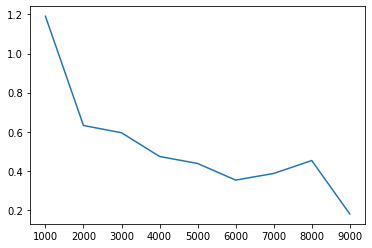

In [30]:
plt.plot(iteration_list, loss_list)
plt.show()